## Importing the required dependencies

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

# Sklearn for machine learning models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score
)

from xgboost import XGBClassifier

import plotly.graph_objects as go



## Loading the required datasets

In [60]:
# Load the dataset
netflix_stock_dataset = r"C:\Users\saite\Downloads\datasets\NFLX.csv"
netflix_imdb = r"C:\Users\saite\Downloads\datasets\titles.csv"
netflix_titles = r"C:\Users\saite\Downloads\datasets\netflix_titles (1).csv"

netflix_stock_dataset = pd.read_csv(netflix_stock_dataset)
netflix_imdb = pd.read_csv(netflix_imdb)
netflix_titles = pd.read_csv(netflix_titles)




## Describing the data

In [61]:
netflix_stock_dataset

Date        Open        High         Low       Close   Adj Close  \
0      2/5/2018  262.000000  267.899994  250.029999  254.259995  254.259995   
1      2/6/2018  247.699997  266.700012  245.000000  265.720001  265.720001   
2      2/7/2018  266.579987  272.450012  264.329987  264.559998  264.559998   
3      2/8/2018  267.079987  267.619995  250.000000  250.100006  250.100006   
4      2/9/2018  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004  1/31/2022  401.970001  427.700012  398.200012  427.140015  427.140015   
1005   2/1/2022  432.959991  458.480011  425.540009  457.130005  457.130005   
1006   2/2/2022  448.250000  451.980011  426.480011  429.480011  429.480011   
1007   2/3/2022  421.440002  429.260010  404.279999  405.600006  405.600006   
1008   2/4/2022  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1     12595800  
2      8981500  
3      9306700  
4     16906900  
...        ...  
1004  20047500  
1005  22542300  
1006  14346000  
1007   9905200  
1008   7782400  

[1009 rows x 7 columns]

In [62]:
netflix_imdb

id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          1945   
1     A mentally unstable Vietnam War veteran works ...          1976   
2     Intent on seeing the Cahulawassee River before...          1972   
3     King Arthur, accompanied by his squire, recrui...          1975   
4     12 American military prisoners in World War II...          1967   
...                                                 ...           ...   
5845  A beautiful love story that can happen between...          2021   
5846  A heart warming film that explores the concept...          2021   
5847  A controversial TV host and comedian who has b...          2021   
5848  Jamie Foxx, David Alan Grier and more from the...          2021   
5849  With winter behind them, Bheem and his townspe...          2021   

     age_certification  runtime                                       genres  \
0                TV-MA       51                            ['documentation']   
1                    R      114                           ['drama', 'crime']   
2                    R      109  ['drama', 'action', 'thriller', 'european']   
3                   PG       91              ['fantasy', 'action', 'comedy']   
4                  NaN      150                            ['war', 'action']   
...                ...      ...                                          ...   
5845               NaN      100                         ['romance', 'drama']   
5846               NaN      134                                    ['drama']   
5847               NaN       90                                   ['comedy']   
5848             PG-13       37                                           []   
5849               NaN        7            ['family', 'animation', 'comedy']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
0                  ['US']      1.0         NaN         NaN         NaN   
1                  ['US']      NaN   tt0075314         8.2    808582.0   
2                  ['US']      NaN   tt0068473         7.7    107673.0   
3                  ['GB']      NaN   tt0071853         8.2    534486.0   
4            ['GB', 'US']      NaN   tt0061578         7.7     72662.0   
...                   ...      ...         ...         ...         ...   
5845               ['NG']      NaN  tt13857480         6.8        45.0   
5846                   []      NaN  tt11803618         7.7       348.0   
5847               ['CO']      NaN  tt14585902         3.8        68.0   
5848               ['US']      NaN         NaN         NaN         NaN   
5849                   []      1.0  tt13711094         7.8        18.0   

      tmdb_popularity  tmdb_score  
0               0.600         NaN  
1              40.965       8.179  
2              10.010       7.300  
3              15.461       7.811  
4              20.398       7.600  
...               ...         ...  
5845            1.466         NaN  
5846              NaN         NaN  
5847           26.005       6.300  
5848            1.296      10.000  
5849            2.289      10.000  

[5850 rows x 15 columns]

In [63]:
netflix_titles


show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

# Data Cleaning of all 3 files
1.netflix_stock_dataset
2.netflix_imdb
3.netflix_titles

netflix_imdb - cleaning steps

In [64]:
# Keep rows with critical columns only
critical_columns = ['imdb_score', 'release_year']
netflix_imdb = netflix_imdb.dropna(subset=critical_columns)

# Retain rows where 'imdb_score' and 'release_year' have meaningful values
netflix_imdb = netflix_imdb[
    (netflix_imdb['imdb_score'] >= 0) & (netflix_imdb['release_year'] > 1900)
]

# Convert numeric columns; non-convertible values become NaN
numeric_columns = ['runtime', 'seasons', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
for col in numeric_columns:
    netflix_imdb[col] = pd.to_numeric(netflix_imdb[col], errors='coerce')

# Drop rows with too many missing values
netflix_imdb = netflix_imdb.dropna(thresh=int(0.5 * netflix_imdb.shape[1]))

# Revalidate the dataset

display(netflix_imdb.head())


id                            title   type  \
1   tm84618                      Taxi Driver  MOVIE   
2  tm154986                      Deliverance  MOVIE   
3  tm127384  Monty Python and the Holy Grail  MOVIE   
4  tm120801                  The Dirty Dozen  MOVIE   
5   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   
5  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime                                       genres  \
1                 R      114                           ['drama', 'crime']   
2                 R      109  ['drama', 'action', 'thriller', 'european']   
3                PG       91              ['fantasy', 'action', 'comedy']   
4               NaN      150                            ['war', 'action']   
5             TV-14       30                       ['comedy', 'european']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
1               ['US']      NaN  tt0075314         8.2    808582.0   
2               ['US']      NaN  tt0068473         7.7    107673.0   
3               ['GB']      NaN  tt0071853         8.2    534486.0   
4         ['GB', 'US']      NaN  tt0061578         7.7     72662.0   
5               ['GB']      4.0  tt0063929         8.8     73424.0   

   tmdb_popularity  tmdb_score  
1           40.965       8.179  
2           10.010       7.300  
3           15.461       7.811  
4           20.398       7.600  
5           17.617       8.306

netflix_titles - cleaning steps

In [65]:
import pandas as pd

# Fill Missing Values in the 'rating' Column
# Replace missing ratings with "Unrated"
netflix_titles['rating'].fillna('Unrated', inplace=True)

# Convert 'date_added' to String and Strip Extra Spaces
# Ensures uniform formatting
netflix_titles['date_added'] = netflix_titles['date_added'].astype(str).str.strip()

#  Convert 'date_added' to Datetime Format
# Invalid dates are coerced to NaT (Not a Time)
netflix_titles['date_added'] = pd.to_datetime(netflix_titles['date_added'], errors='coerce')

#  Handle Invalid Dates
# Drop rows where 'date_added' could not be converted
netflix_titles.dropna(subset=['date_added'], inplace=True)

# Extract Year and Month from 'date_added'
# Adds new columns for year and month
netflix_titles['year_added'] = netflix_titles['date_added'].dt.year
netflix_titles['month_added'] = netflix_titles['date_added'].dt.month

# Calculate 'content_age'
# Represents the age of the content based on the current year
netflix_titles['content_age'] = 2024 - netflix_titles['release_year']

# Validate Cleaned Data
display(netflix_titles.head())



show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  year_added  month_added  \
0  As her father nears the end of his life, filmm...        2021            9   
1  After crossing paths at a party, a Cape Town t...        2021            9   
2  To protect his family from a powerful drug lor...        2021            9   
3  Feuds, flirtations and toilet talk go down amo...        2021            9   
4  In a city of coaching centers known to train I...        2021            9   

   content_age  
0            4  
1            3  
2            3  
3            3  
4            3

netflix_stock_dataset - Data Cleaning

In [66]:
# Convert 'Date' to datetime format
netflix_stock_dataset['Date'] = pd.to_datetime(netflix_stock_dataset['Date'])

# Remove duplicate rows
netflix_stock_dataset.drop_duplicates(inplace=True)

# Validate cleaned data
display(netflix_stock_dataset.head())



Date        Open        High         Low       Close   Adj Close  \
0 2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1 2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2 2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3 2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4 2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900

## Data Manipulation

# 1.netflix_imdb

In [70]:
# Ensure critical columns are clean
netflix_imdb.dropna(subset=['imdb_score', 'release_year'], inplace=True)

# Extract and standardize 'genres' column to keep only the first genre
def clean_and_extract_primary_genre(genres_column):
    genres_column = genres_column.fillna('')  # Handle missing values
    cleaned_genres = genres_column.str.strip("[]").str.replace("'", "").str.lower()  # Standardize formatting
    primary_genre = cleaned_genres.str.split(',').str[0].str.strip()  # Extract the first genre
    return primary_genre

netflix_imdb['genres'] = clean_and_extract_primary_genre(netflix_imdb['genres'])

# Add a success column based on imdb_score
netflix_imdb['success'] = (netflix_imdb['imdb_score'] >= 7).astype(int)

# Handle outliers in imdb_score
def handle_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

netflix_imdb = handle_outliers(netflix_imdb, 'imdb_score')

# Validate manipulated dataset
display(netflix_imdb.head())



id                            title   type  \
1   tm84618                      Taxi Driver  MOVIE   
2  tm154986                      Deliverance  MOVIE   
3  tm127384  Monty Python and the Holy Grail  MOVIE   
4  tm120801                  The Dirty Dozen  MOVIE   
5   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
1  A mentally unstable Vietnam War veteran works ...          1976   
2  Intent on seeing the Cahulawassee River before...          1972   
3  King Arthur, accompanied by his squire, recrui...          1975   
4  12 American military prisoners in World War II...          1967   
5  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime   genres production_countries  seasons  \
1                 R      114    drama               ['US']      NaN   
2                 R      109    drama               ['US']      NaN   
3                PG       91  fantasy               ['GB']      NaN   
4               NaN      150      war         ['GB', 'US']      NaN   
5             TV-14       30   comedy               ['GB']      4.0   

     imdb_id  imdb_score  imdb_votes  tmdb_popularity  tmdb_score  success  
1  tt0075314         8.2    808582.0           40.965       8.179        1  
2  tt0068473         7.7    107673.0           10.010       7.300        1  
3  tt0071853         8.2    534486.0           15.461       7.811        1  
4  tt0061578         7.7     72662.0           20.398       7.600        1  
5  tt0063929         8.8     73424.0           17.617       8.306        1

# 2. netflix_titles 

In [71]:
import pandas as pd

# Ensure required columns are clean
netflix_titles.dropna(subset=['title', 'type', 'rating', 'release_year'], inplace=True)

# Add holiday release indicator
netflix_titles['is_holiday_release'] = netflix_titles['month_added'].isin([11, 12]).astype(int)

# Categorize ratings into broader categories
def categorize_rating(rating):
    if rating in ['R', 'TV-MA']:
        return 'Mature'
    elif rating in ['G', 'TV-G', 'PG', 'TV-PG']:
        return 'Family-Friendly'
    else:
        return 'Other'

netflix_titles['rating_category'] = netflix_titles['rating'].apply(categorize_rating)

# Handle content_age outliers (if applicable)
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

if 'content_age' in netflix_titles.columns:
    netflix_titles = handle_outliers(netflix_titles, 'content_age')

# Add Covid-19 period indicator
netflix_titles['is_covid_period'] = netflix_titles['release_year'].isin([2020, 2021]).astype(int)

# Validate manipulated dataset

display(netflix_titles.head())


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  year_added  month_added  \
0  As her father nears the end of his life, filmm...        2021            9   
1  After crossing paths at a party, a Cape Town t...        2021            9   
2  To protect his family from a powerful drug lor...        2021            9   
3  Feuds, flirtations and toilet talk go down amo...        2021            9   
4  In a city of coaching centers known to train I...        2021            9   

   content_age  is_holiday_release rating_category  is_covid_period  
0            4                   0           Other                1  
1            3                   0          Mature                1  
2            3                   0          Mature                1  
3            3                   0          Mature                1  
4            3                   0          Mature                1

# 3. netflix_stock_dataset 

In [33]:
# Check for missing values in the dataset

netflix_stock_dataset.isnull().sum()

# Handle missing values (if any)
# Example: Fill missing numerical values with mean
netflix_stock_dataset.fillna(netflix_stock_dataset.mean(), inplace=True)

# Check for duplicate rows
"\nNumber of duplicate rows:", netflix_stock_dataset.duplicated().sum()

# Remove duplicate rows
netflix_stock_dataset = netflix_stock_dataset.drop_duplicates()


# Ensure correct data types
# Validate numerical columns
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numerical_columns:
    display(netflix_stock_dataset[col].describe())

# Check for outliers (e.g., using IQR method)
Q1 = netflix_stock_dataset['Close'].quantile(0.25)
Q3 = netflix_stock_dataset['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((netflix_stock_dataset['Close'] < (Q1 - 1.5 * IQR)) | (netflix_stock_dataset['Close'] > (Q3 + 1.5 * IQR)))



count    1009.000000
mean      419.059673
std       108.537532
min       233.919998
25%       331.489990
50%       377.769989
75%       509.130005
max       692.349976
Name: Open, dtype: float64

count    1009.000000
mean      425.320703
std       109.262960
min       250.649994
25%       336.299988
50%       383.010010
75%       515.630005
max       700.989990
Name: High, dtype: float64

count    1009.000000
mean      412.374044
std       107.555867
min       231.229996
25%       326.000000
50%       370.880005
75%       502.529999
max       686.090027
Name: Low, dtype: float64

count    1009.000000
mean      419.000733
std       108.289999
min       233.880005
25%       331.619995
50%       378.670013
75%       509.079987
max       691.690002
Name: Close, dtype: float64

count    1.009000e+03
mean     7.570685e+06
std      5.465535e+06
min      1.144000e+06
25%      4.091900e+06
50%      5.934500e+06
75%      9.322400e+06
max      5.890430e+07
Name: Volume, dtype: float64

In [102]:
# Merge the datasets using a common column, 'title'
# Assuming 'title' is the key in both datasets
merged_data_netflix = pd.merge(
    netflix_imdb, 
    netflix_titles[['title', 'country', 'rating', 'release_year']],  # Select relevant columns from netflix_titles
    on='title', 
    how='inner'  # Perform an inner join
)


# Display a preview of the merged dataset
display(merged_data.head())
print(merged_data_netflix.columns)


#Display data types of all columns
print("Column Data Types:")
print(merged_data_netflix.dtypes)

# Optional: Get a summary of numeric and non-numeric columns
numeric_columns = merged_data_netflix.select_dtypes(include=['number']).columns
categorical_columns = merged_data_netflix.select_dtypes(exclude=['number']).columns

print("\nNumeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)


id                title type_x  \
0   tm84618          Taxi Driver  MOVIE   
1   tm94651              Dostana  MOVIE   
2   tm54450            Christine  MOVIE   
3   ts25028     Wheel of Fortune   SHOW   
4  tm117580  She's Gotta Have It  MOVIE   

                                       description_x  release_year_x  \
0  A mentally unstable Vietnam War veteran works ...            1976   
1  Two close friends decide to enter law enforcem...            1980   
2  Geeky student Arnie Cunningham falls for Chris...            1983   
3  This game show sees contestants solve word puz...            1983   
4  The story of Nola Darling's simultaneous sexua...            1986   

  age_certification  runtime  \
0                 R      114   
1               NaN      161   
2                 R      110   
3              TV-G       26   
4                 R       84   

                                              genres production_countries  \
0                                 ['drama', 'crime']               ['US']   
1  ['drama', 'comedy', 'crime', 'romance', 'action']               ['IN']   
2                 ['horror', 'thriller', 'european']               ['US']   
3                                         ['family']               ['US']   
4                              ['romance', 'comedy']               ['US']   

   seasons  ... rating   duration                                  listed_in  \
0      NaN  ...  TV-MA     94 min       Comedies, Dramas, Independent Movies   
1      NaN  ...  TV-14    142 min     Comedies, Dramas, International Movies   
2      NaN  ...      R    119 min                 Dramas, Independent Movies   
3     39.0  ...   TV-G  3 Seasons                                 Reality TV   
4      NaN  ...  TV-MA  2 Seasons  Romantic TV Shows, TV Comedies, TV Dramas   

                                       description_y  year_added  month_added  \
0  After his father dies, a young mechanic moves ...        2020            2   
1  To win over a landlady who only accepts women ...        2020            4   
2  In a film based on true events, an awkward but...        2020            8   
3  Pat Sajak and Vanna White host one of TV's mos...        2021            8   
4  Nola Darling struggles to stay true to herself...        2019            5   

   content_age  is_holiday_release  rating_category  is_covid_period  
0            9                   0           Mature                0  
1           16                   0            Other                0  
2            8                   0           Mature                0  
3            5                   0  Family-Friendly                0  
4            6                   0           Mature                0  

[5 rows x 104 columns]

Index(['id', 'title', 'type', 'description', 'release_year_x',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'success', 'country', 'rating', 'release_year_y'],
      dtype='object')
Column Data Types:
id                       object
title                    object
type                     object
description              object
release_year_x            int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
success                   int32
country                  object
rating                   object
release_year_y            int64
dtype: object

Numeric Columns:
Index(['release_year_x', 'runtime',

In [103]:
# Check if release_year_x and release_year_y exist and are identical
if 'release_year_x' in merged_data_netflix.columns and 'release_year_y' in merged_data_netflix.columns:
    if merged_data_netflix['release_year_x'].equals(merged_data_netflix['release_year_y']):
        # If identical, keep both but rename one for clarity
        merged_data_netflix.rename(columns={'release_year_x': 'release_year'}, inplace=True)
    else:
        print("release_year_x and release_year_y differ; keeping both columns.")

# Standardize 'genres' and keep only the first genre
def clean_and_extract_primary_genre(genres_column):
    genres_column = genres_column.fillna('')  # Handle missing values
    cleaned_genres = genres_column.str.strip("[]").str.replace("'", "").str.lower()  # Standardize formatting
    primary_genre = cleaned_genres.str.split(',').str[0].str.strip()  # Extract the first genre
    return primary_genre

merged_data_netflix['primary_genre'] = clean_and_extract_primary_genre(merged_data_netflix['genres'])

# Add a success column based on imdb_score
merged_data_netflix['success'] = (merged_data_netflix['imdb_score'] >= 7).astype(int)

# Handle outliers in numeric columns
def handle_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df  # Keep all rows but add a flag for outliers

for col in ['imdb_score', 'runtime', 'tmdb_score']:
    if col in merged_data_netflix.columns:
        merged_data_netflix[f'{col}_outlier'] = ~handle_outliers(merged_data_netflix, col)[col].between(
            merged_data_netflix[col].quantile(0.25) - 1.5 * (merged_data_netflix[col].quantile(0.75) - merged_data_netflix[col].quantile(0.25)),
            merged_data_netflix[col].quantile(0.75) + 1.5 * (merged_data_netflix[col].quantile(0.75) - merged_data_netflix[col].quantile(0.25))
        )

# Display a sample
display(merged_data_netflix.head())


release_year_x and release_year_y differ; keeping both columns.


id                title   type  \
0   tm84618          Taxi Driver  MOVIE   
1   tm54450            Christine  MOVIE   
2   ts25028     Wheel of Fortune   SHOW   
3  tm117580  She's Gotta Have It  MOVIE   
4     ts987         Danger Mouse   SHOW   

                                         description  release_year_x  \
0  A mentally unstable Vietnam War veteran works ...            1976   
1  Geeky student Arnie Cunningham falls for Chris...            1983   
2  This game show sees contestants solve word puz...            1983   
3  The story of Nola Darling's simultaneous sexua...            1986   
4  Danger Mouse, the world's greatest secret agen...            1981   

  age_certification  runtime     genres production_countries  seasons  ...  \
0                 R      114      drama               ['US']      NaN  ...   
1                 R      110     horror               ['US']      NaN  ...   
2              TV-G       26     family               ['US']     39.0  ...   
3                 R       84    romance               ['US']      NaN  ...   
4              TV-Y       14  animation               ['GB']     10.0  ...   

  tmdb_popularity  tmdb_score  success                        country  rating  \
0          40.965       8.179        1                        Nigeria   TV-MA   
1          23.418       6.800        0  United Kingdom, United States       R   
2           5.935       6.800        0                  United States    TV-G   
3           7.416       6.707        0                  United States   TV-MA   
4           8.550       7.500        1                 United Kingdom   TV-Y7   

   release_year_y primary_genre imdb_score_outlier  runtime_outlier  \
0            2015         drama              False            False   
1            2016        horror              False            False   
2            2019        family              False            False   
3            2018       romance              False            False   
4            2016     animation              False            False   

  tmdb_score_outlier  
0              False  
1              False  
2              False  
3              False  
4              False  

[5 rows x 23 columns]

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Initialize models
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
xgboost_model = XGBRegressor(random_state=42)
linear_model = LinearRegression()

# Train models
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

print("Models trained successfully!")


Models trained successfully!


Regression Model Evaluation Results:


Model       MAE        R²
0      Random Forest  0.257698  0.442964
1            XGBoost  0.276260  0.353214
2  Linear Regression  0.375388  0.273986

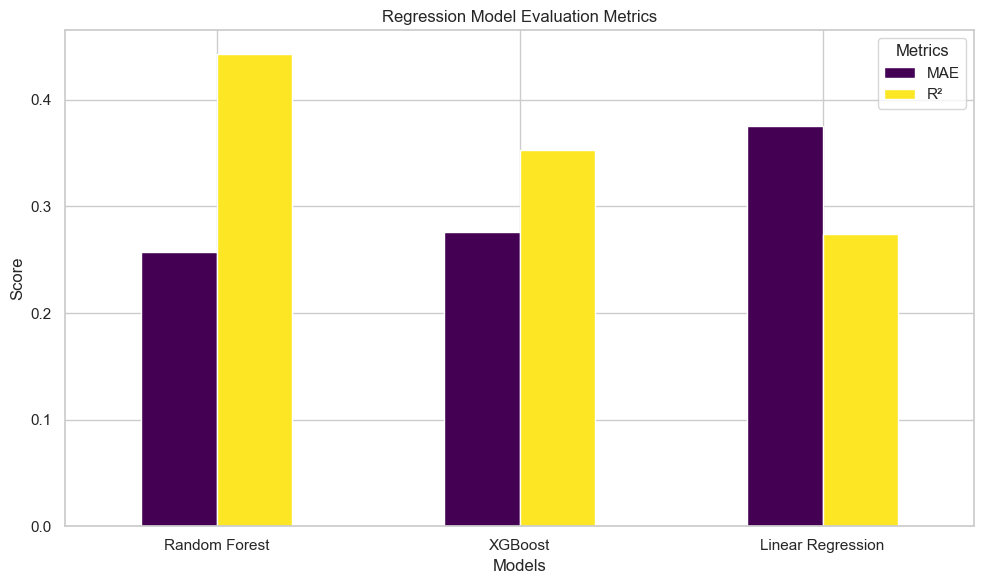

In [106]:
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Define evaluation function
def evaluate_regression_model(y_true, y_pred, model_name):
    metrics = {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred),
    }
    return metrics

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_pred_xgb = xgboost_model.predict(X_test)
y_pred_lr = linear_model.predict(X_test)

# Evaluate models
rf_metrics = evaluate_regression_model(y_test, y_pred_rf, "Random Forest")
xgb_metrics = evaluate_regression_model(y_test, y_pred_xgb, "XGBoost")
lr_metrics = evaluate_regression_model(y_test, y_pred_lr, "Linear Regression")

# Combine results into a DataFrame
results_df = pd.DataFrame([rf_metrics, xgb_metrics, lr_metrics])

# Display results
print("Regression Model Evaluation Results:")
display(results_df)

# Plot results
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6), rot=0, colormap="viridis")
plt.title("Regression Model Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


In [79]:
# Add Daily Returns for volatility analysis
netflix_stock_dataset['Daily Returns'] = netflix_stock_dataset['Close'].pct_change()

# Add Moving Averages (50-day and 200-day) for trend analysis
netflix_stock_dataset['50-Day MA'] = netflix_stock_dataset['Close'].rolling(window=50).mean()
netflix_stock_dataset['200-Day MA'] = netflix_stock_dataset['Close'].rolling(window=200).mean()

# Drop NaN values generated by rolling calculations
netflix_stock_dataset.dropna(inplace=True)

## Exploratory Data Analysis

# 1.  Analyze Netflix's Growth: Stock Price vs. Content Releases
    Group stock price data by month.
    Group content releases by month.
    Plot the trends.

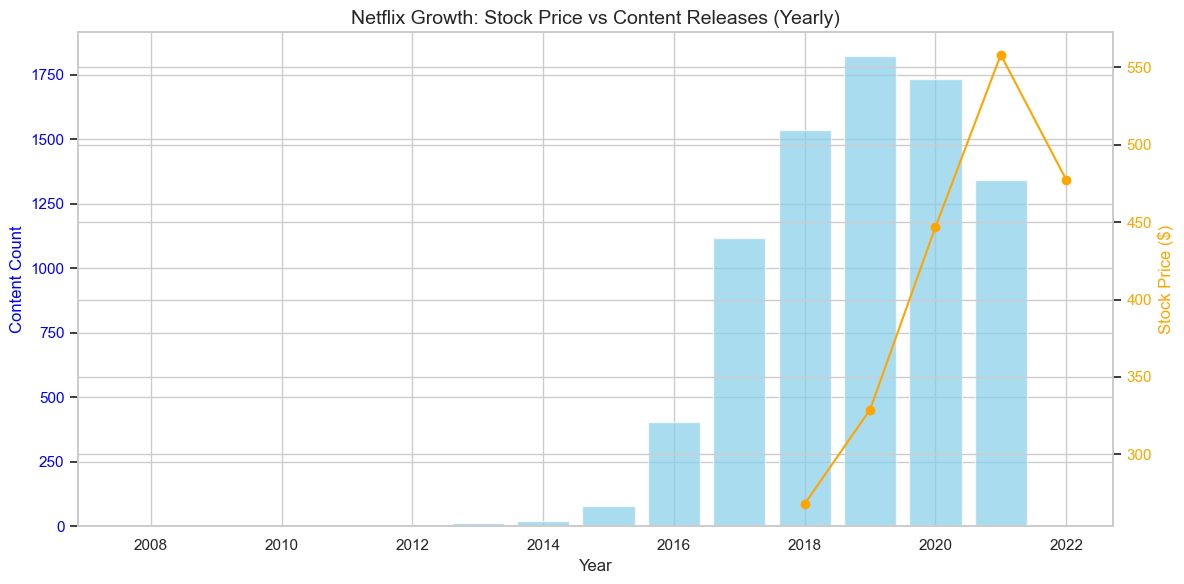

In [15]:
# Ensure 'Year' is extracted from the 'Date' column
netflix_stock_dataset['Year'] = netflix_stock_dataset['Date'].dt.year

# Analyze Netflix's growth in relation to stock price changes and content releases by year
content_by_year = netflix_titles.groupby(netflix_titles['year_added']).size()
avg_stock_price_by_year = netflix_stock_dataset.groupby('Year')['Close'].mean()

# Overlapped visualization for content releases and stock price changes by year
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar graph for content releases by year
ax1.bar(content_by_year.index, content_by_year.values, color='skyblue', alpha=0.7, label='Content Releases')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Content Count', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for stock price changes by year
ax2 = ax1.twinx()
ax2.plot(avg_stock_price_by_year.index, avg_stock_price_by_year.values, color='orange', marker='o', label='Avg Stock Price')
ax2.set_ylabel('Stock Price ($)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and legend
plt.title('Netflix Growth: Stock Price vs Content Releases (Yearly)', fontsize=14)
fig.tight_layout()
plt.show()


# 2. Movies vs. TV Shows: Trends Over Time
Group by year and content type.
Plot stacked bar charts to compare trends.

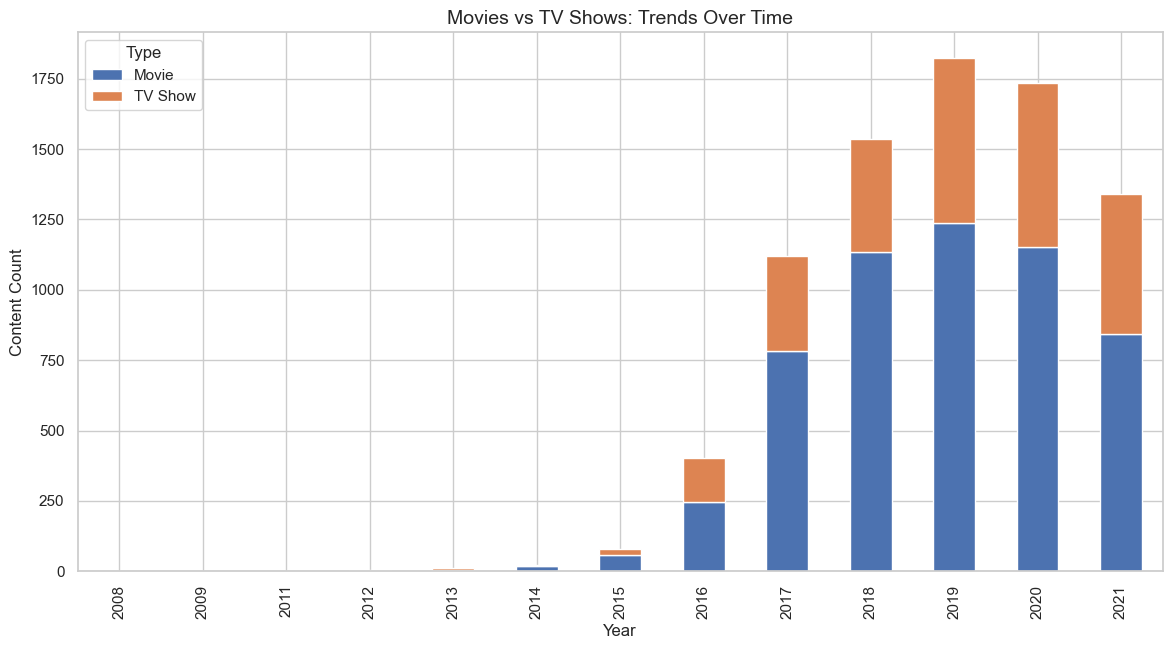

In [35]:
# Examine Netflix's focus on Movies vs. TV Shows and trends over time
content_by_type_year = netflix_titles.groupby(['year_added', 'type']).size().unstack()

# Visualization
content_by_type_year.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Movies vs TV Shows: Trends Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.legend(title="Type")
plt.show()

# Filter out rows without a country or type
netflix_titles_filtered = netflix_titles.dropna(subset=['country', 'type'])
 
# Count the total movies and TV shows by country
count_by_type = netflix_titles_filtered.groupby(['country', 'type']).size().reset_index(name='Count')
 
# Pivot the data to get movies and TV shows as separate columns
pivot_table = count_by_type.pivot(index='country', columns='type', values='Count').fillna(0)
 
# Add a total column and calculate percentages for movies and TV shows
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table['Movie Percentage'] = (pivot_table.get('Movie', 0) / pivot_table['Total']) * 100
pivot_table['TV Show Percentage'] = (pivot_table.get('TV Show', 0) / pivot_table['Total']) * 100
 
# Sort by total count and select the top 10 countries
top_10_countries = pivot_table.sort_values(by='Total', ascending=False).head(10).reset_index()
 
# Create the stacked bar chart with labels
fig = go.Figure()
 
# Add the "Movie" bars
fig.add_trace(
    go.Bar(
        y=top_10_countries['country'],
        x=top_10_countries['Movie Percentage'],
        name='Movies',
        orientation='h',
        marker=dict(color='#E74C3C'),  # Red color
        text=[f"{p:.1f}%" for p in top_10_countries['Movie Percentage']],  # Add percentage labels
        textposition='inside'  # Show inside the bars
    )
)
 
# Add the "TV Show" bars
fig.add_trace(
    go.Bar(
        y=top_10_countries['country'],
        x=top_10_countries['TV Show Percentage'],
        name='TV Shows',
        orientation='h',
        marker=dict(color='#4D4D4D'),  # Gray color
        text=[f"{p:.1f}%" for p in top_10_countries['TV Show Percentage']],  # Add percentage labels
        textposition='inside'  # Show inside the bars
    )
)
 
# Update layout for a cleaner look
fig.update_layout(
    barmode='stack',
    title='Movies vs. TV Shows among Top 10 Netflix Library',
    xaxis_title='Percentage',
    yaxis_title='Country',
    legend_title_text='Type',
    template='plotly_white',
    xaxis=dict(ticksuffix='%')  # Add % suffix to x-axis ticks
)
 
# Show the chart
fig.show()


# 3. Content Release Patterns: Monthly and Holiday Seasons
Count releases by month.
Calculate holiday season releases as a percentage.

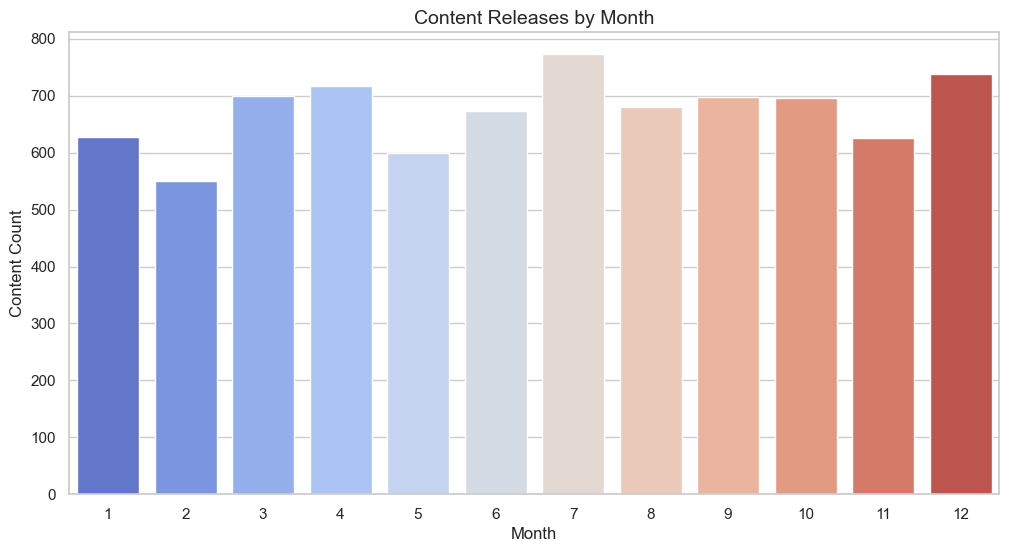

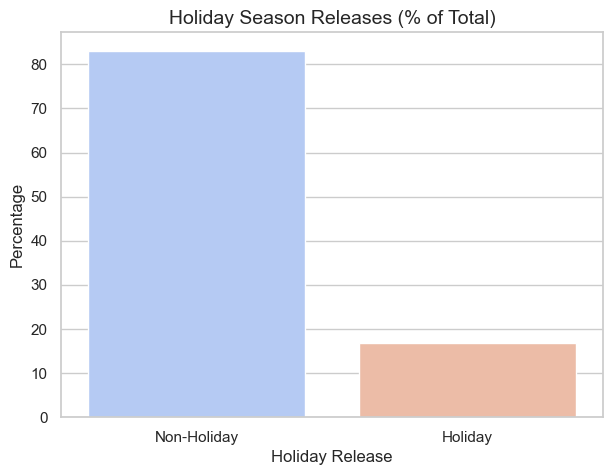

In [36]:
# Content release patterns by month and during holiday seasons
monthly_releases = netflix_titles.groupby('month_added').size()
holiday_releases = netflix_titles['is_holiday_release'].value_counts(normalize=True) * 100

# Monthly releases visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_releases.index, y=monthly_releases.values, palette="coolwarm")
plt.title('Content Releases by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.show()

# Holiday releases visualization
plt.figure(figsize=(7, 5))
sns.barplot(x=holiday_releases.index, y=holiday_releases.values, palette="coolwarm")
plt.title('Holiday Season Releases (% of Total)', fontsize=14)
plt.xlabel('Holiday Release', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


# 4. Geographical Distribution of Content
Analyze the distribution of content by country.



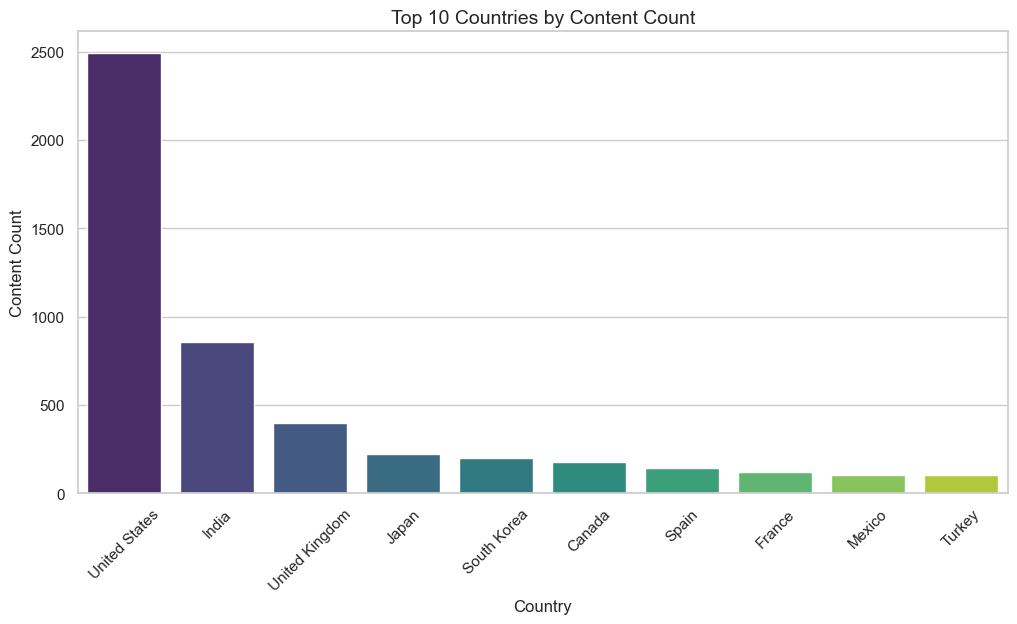

In [37]:
# Geographical distribution of content
top_countries = netflix_titles['country'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries by Content Count', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Content Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# 5. Content Age Variation by Country
Group by country and calculate average content age.

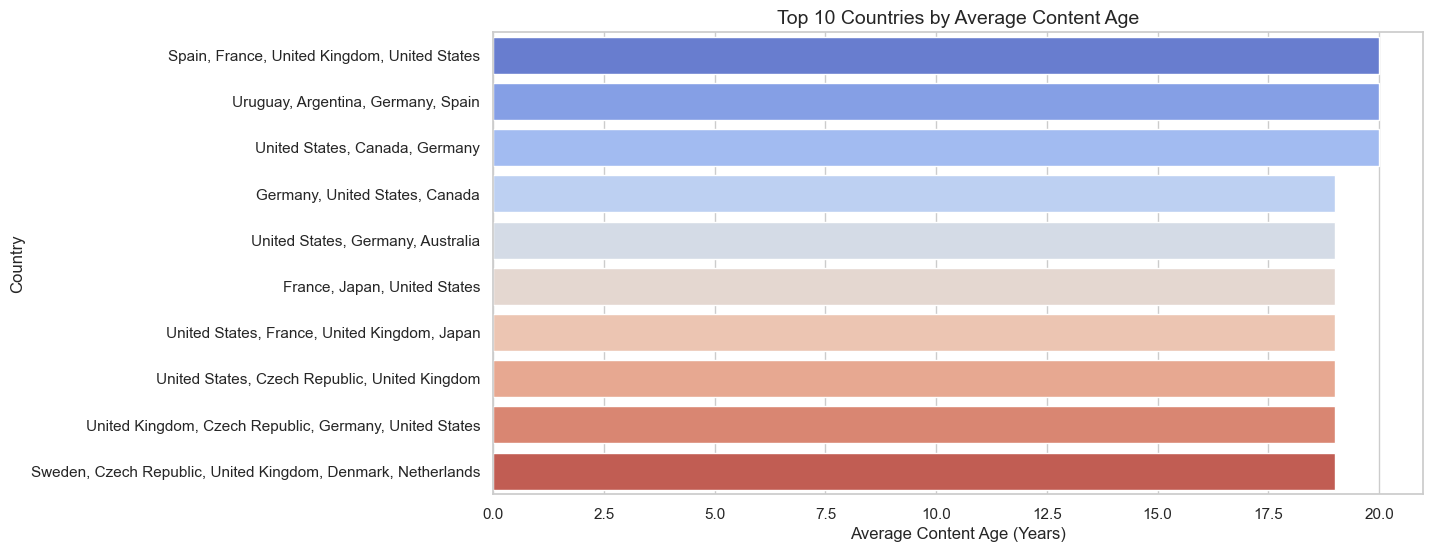

In [39]:
# Recalculate content age variation by country
content_age_by_country = netflix_titles.groupby('country')['content_age'].mean().sort_values(ascending=False).head(10)

# Horizontal bar chart for content age variation by country
plt.figure(figsize=(12, 6))
sns.barplot(y=content_age_by_country.index, x=content_age_by_country.values, palette="coolwarm", orient="h")
plt.title('Top 10 Countries by Average Content Age', fontsize=14)
plt.xlabel('Average Content Age (Years)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()



# 7. Ratings, Target Audiences, and Genre Preferences
Visualize the distribution of ratings.
Plot the most common genres.

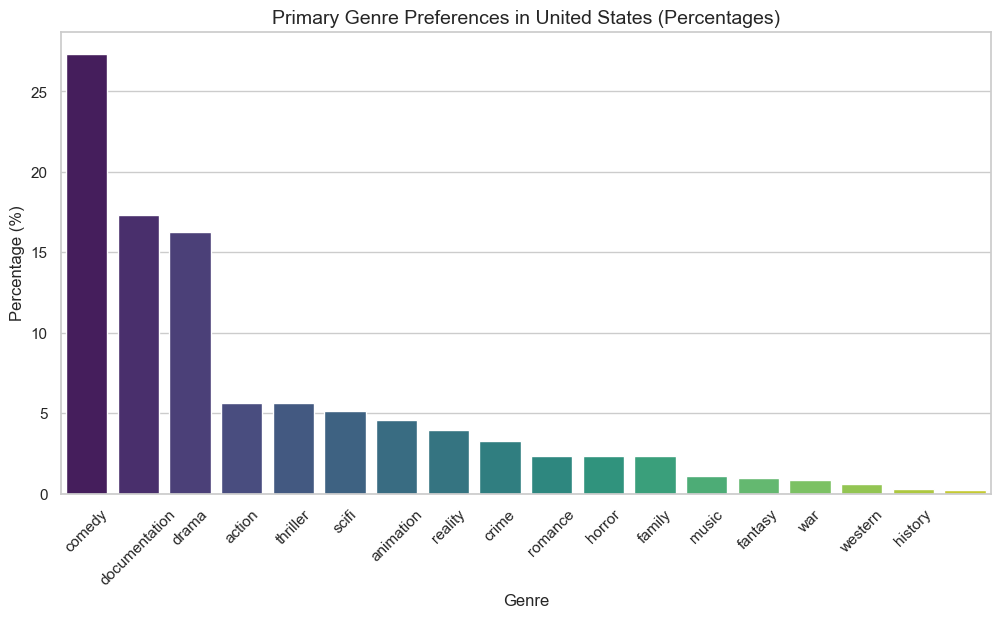

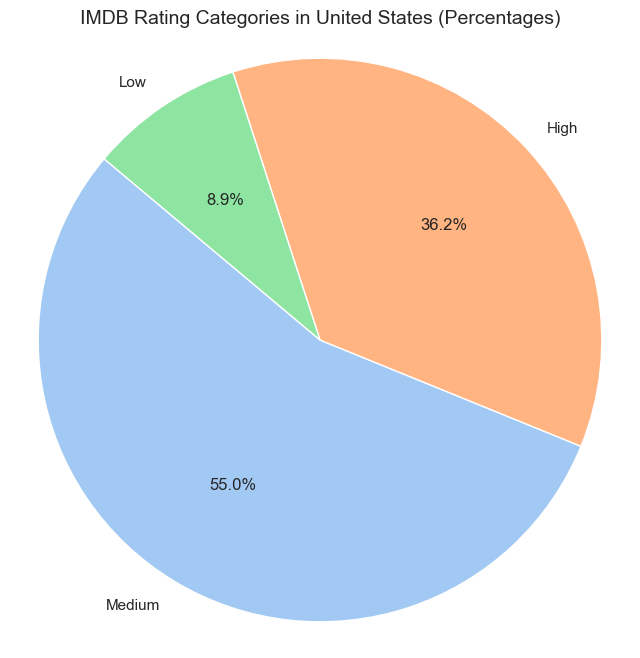

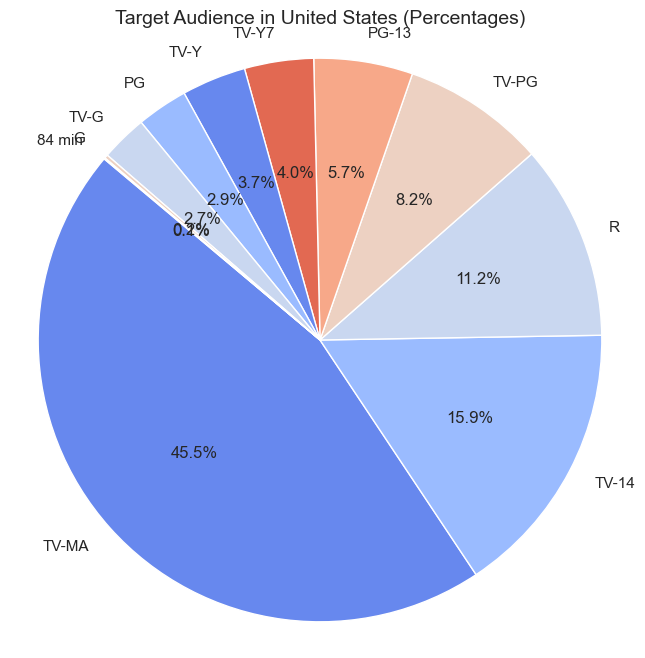

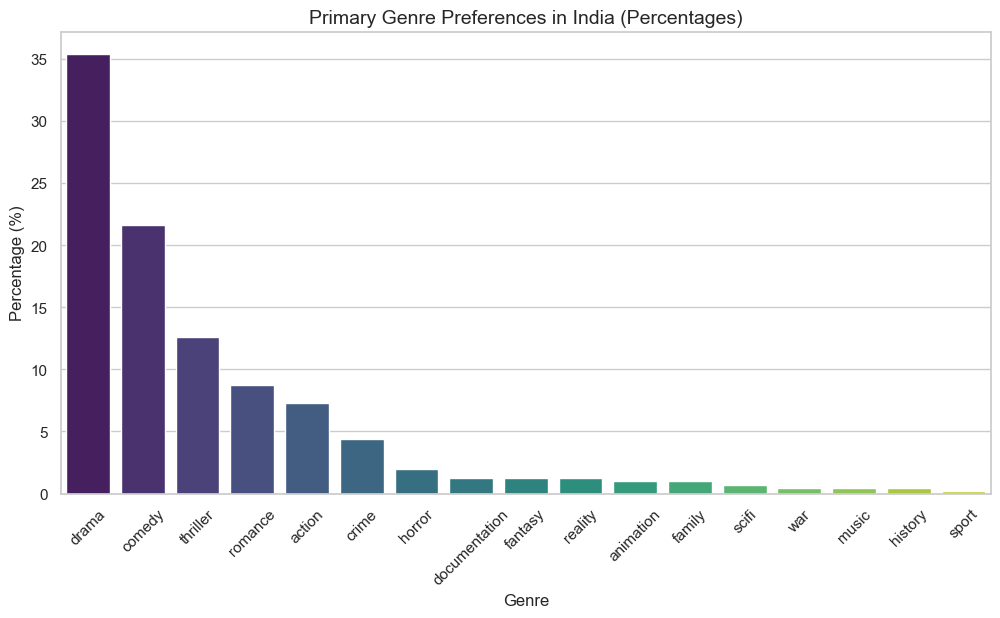

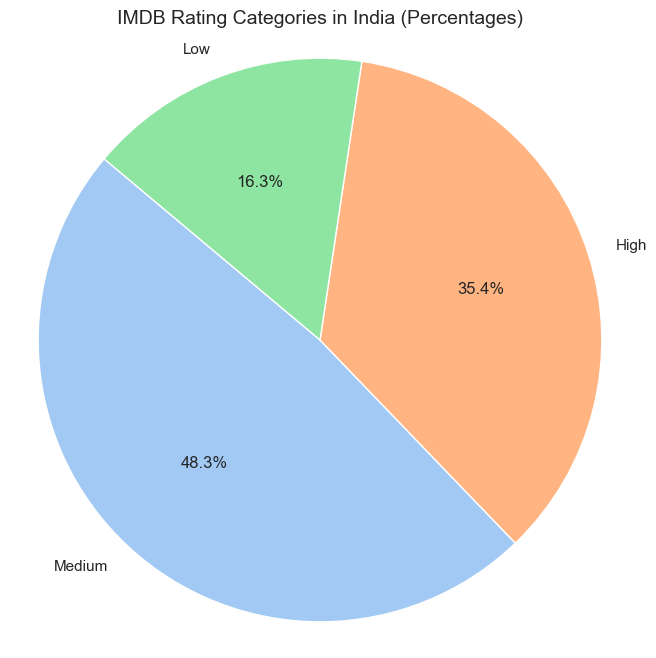

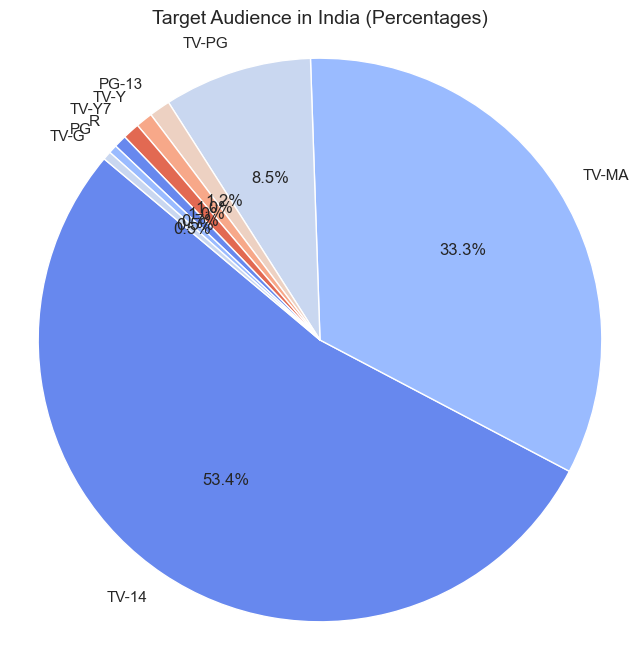

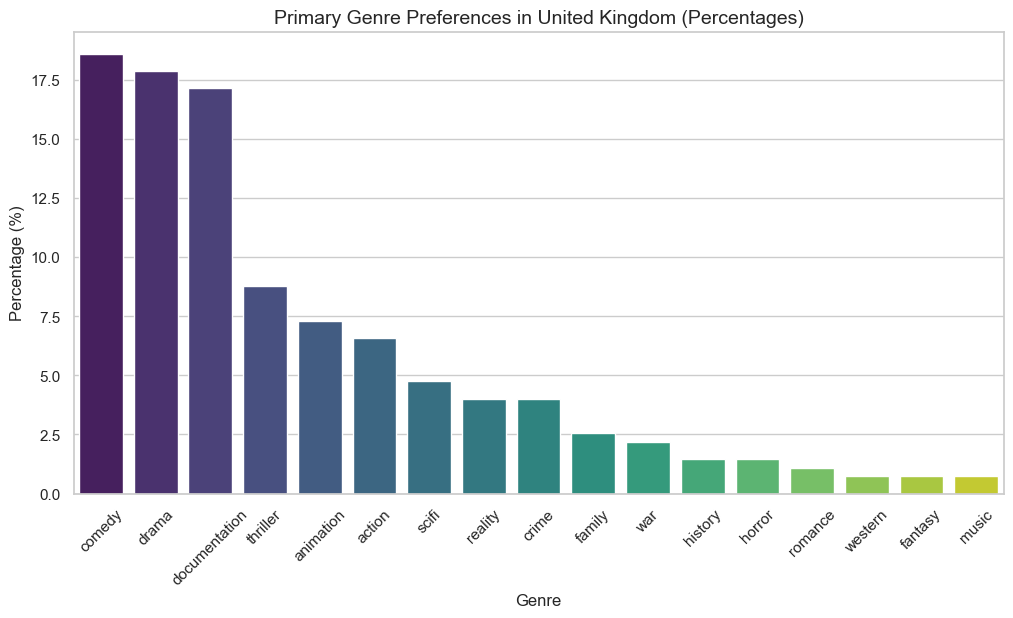

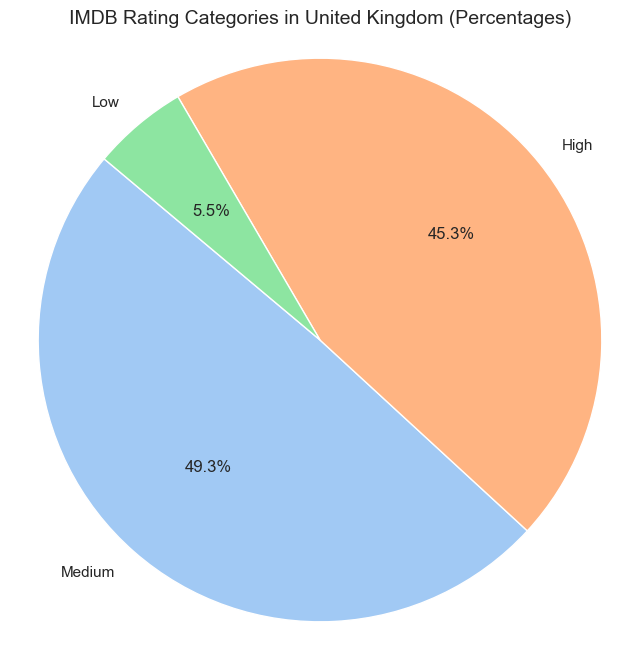

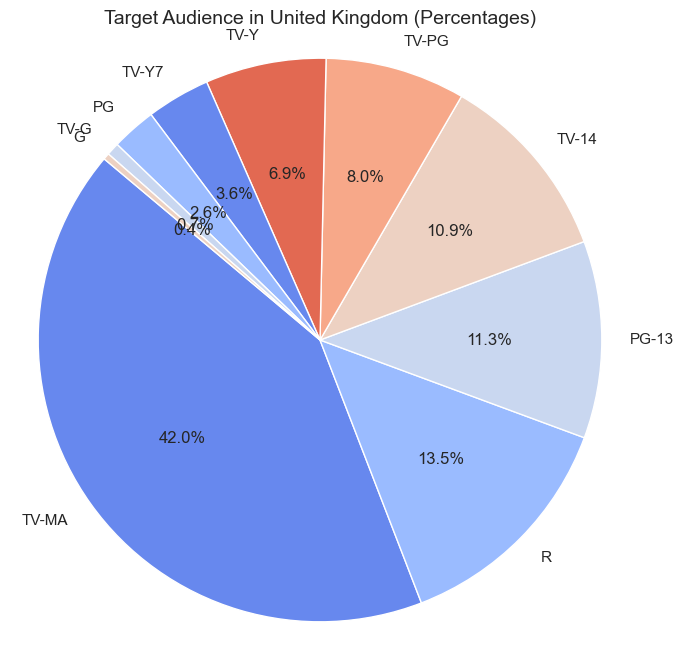

In [57]:
import re

# Merge the datasets to include country and ratings information
merged_data = pd.merge(netflix_imdb, netflix_titles[['title', 'country', 'rating']], on='title', how='inner')

# List of countries to analyze
top_countries = ['United States', 'India', 'United Kingdom']

# Clean and extract the first genre from the 'genres' column
def clean_and_extract_primary_genre(genres_column):
    genres_column = genres_column.fillna('')  # Handle missing values
    cleaned_genres = genres_column.str.split(',').str[0].str.strip()  # Extract the first genre
    cleaned_genres = cleaned_genres.apply(lambda x: re.sub(r"[^\w\s]", "", x))  # Remove non-alphanumeric characters
    return cleaned_genres

# Apply the cleaning function to the dataset
merged_data['primary_genre'] = clean_and_extract_primary_genre(merged_data['genres'])

# Get the unique values of primary genres
unique_genres = merged_data['primary_genre'].unique()


for country in top_countries:
    # Filter data for the specific country using 'country' column
    country_data = merged_data[merged_data['country'].str.contains(country, na=False, case=False)]

    if country_data.empty:
        print(f"No data available for {country}")
        continue

    # Genre preferences for the country (as percentages)
    primary_genre_distribution = country_data['primary_genre'].value_counts(normalize=True) * 100

    # Bar chart for Genre Preferences
    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=primary_genre_distribution.index,
        y=primary_genre_distribution.values,
        palette="viridis"
    )
    plt.title(f'Primary Genre Preferences in {country} (Percentages)', fontsize=14)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

    # IMDB Rating categorization and percentages
    if 'imdb_score' in country_data.columns:
        country_data['Rating Category'] = pd.cut(
            country_data['imdb_score'],
            bins=[0, 5, 7, 10],
            labels=['Low', 'Medium', 'High'],
            include_lowest=True
        )
        rating_category_distribution = country_data['Rating Category'].value_counts(normalize=True) * 100

        # Pie chart for IMDB Rating Categories
        plt.figure(figsize=(8, 8))
        plt.pie(rating_category_distribution, labels=rating_category_distribution.index,
                autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
        plt.title(f'IMDB Rating Categories in {country} (Percentages)', fontsize=14)
        plt.axis('equal')
        plt.show()
    else:
        print(f"No 'imdb_score' column found in the dataset for {country}")

    # Target audience (rating column from netflix_titles.csv)
    if 'rating' in country_data.columns:
        target_audience_distribution = country_data['rating'].value_counts(normalize=True) * 100

        # Pie chart for Target Audience
        plt.figure(figsize=(8, 8))
        plt.pie(target_audience_distribution, labels=target_audience_distribution.index,
                autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm"))
        plt.title(f'Target Audience in {country} (Percentages)', fontsize=14)
        plt.axis('equal')
        plt.show()
    else:
        print(f"No 'rating' column found in the dataset for {country}")


#Dataset Preparation:

The target column (success) is defined as the variable to predict.
Features are selected by excluding the target variable and other columns that may lead to data leakage (e.g., imdb_score which influences success).
Only numeric columns are selected for the models, ensuring compatibility with machine learning algorithms.
Handling Missing Values:

Rows with missing values in the target column are removed to ensure a clean target variable for training.
Missing values in features are imputed using the mean strategy, replacing missing entries with the average value for each column.
Train-Test Split:

The dataset is split into training (80%) and testing (20%) sets using train_test_split.
random_state=42 ensures reproducibility of the split.
Feature and Target Validation:

The shapes of the training and testing sets are displayed to verify the split.
A preview of the training set is provided to validate the data preparation steps.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target column and feature columns
target_column = 'success'  # Example target variable
feature_columns = merged_data_netflix.columns.difference([target_column])  # Use all other columns as features

# Ensure no missing values in target and selected feature columns
merged_data_netflix = merged_data_netflix.dropna(subset=[target_column])

# Separate features (X) and target (y)
X = merged_data_netflix[feature_columns]
y = merged_data_netflix[target_column]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

# Display a preview of the training set
print("Training Set Preview:")
display(X_train.head(), y_train.head())


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Exclude target leakage by removing features derived from the target
features_to_exclude = ['success', 'imdb_score']  # Example: 'imdb_score' directly influences 'success'
X = merged_data_netflix.drop(columns=features_to_exclude).select_dtypes(include=[float, int])
y = merged_data_netflix['success']

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute missing values with column mean
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")


Training Features Shape: (2726, 7)
Testing Features Shape: (682, 7)
Training Target Shape: (2726,)
Testing Target Shape: (682,)


In [82]:
# Define the target variable (Close Price) for netflix_stock_dataset
y_stock = netflix_stock_dataset['Close']

# Use temporal splitting for time series data
train_size = int(len(y_stock) * 0.8)  # 80% training, 20% testing
train_stock, test_stock = y_stock[:train_size], y_stock[train_size:]

print(f"Stock Training Set Shape: {train_stock.shape}")
print(f"Stock Testing Set Shape: {test_stock.shape}")


Stock Training Set Shape: (648,)
Stock Testing Set Shape: (162,)


The Logistic Regression, Random Forest, and XGBoost classification models were trained to predict the target variable (success) using optimized hyperparameters for accuracy and performance. Additionally, the ARIMA model was applied to the Netflix stock dataset for time series analysis, leveraging order parameters derived from ACF/PACF plots to capture stock trends effectively. These models collectively address both categorical predictions and temporal pattern recognition.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)

print("Classification Models Trained Successfully!")


Classification Models Trained Successfully!


This script trains and evaluates Classification (Logistic Regression, Random Forest, XGBoost) and Regression models (Random Forest Regressor, XGBoost Regressor, Linear Regression) using prepared datasets, while excluding features prone to data leakage and imputing missing values for robust performance evaluation.



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  807
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3028.031
Date:                Sun, 01 Dec 2024   AIC                           6066.062
Time:                        11:32:37   BIC                           6089.522
Sample:                             0   HQIC                          6075.071
                                - 807                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0493      0.134      0.368      0.713      -0.213       0.312
ar.L2          0.7193      0.109      6.591      0.000       0.505       0.933
ma.L1         -0.1576      0.1

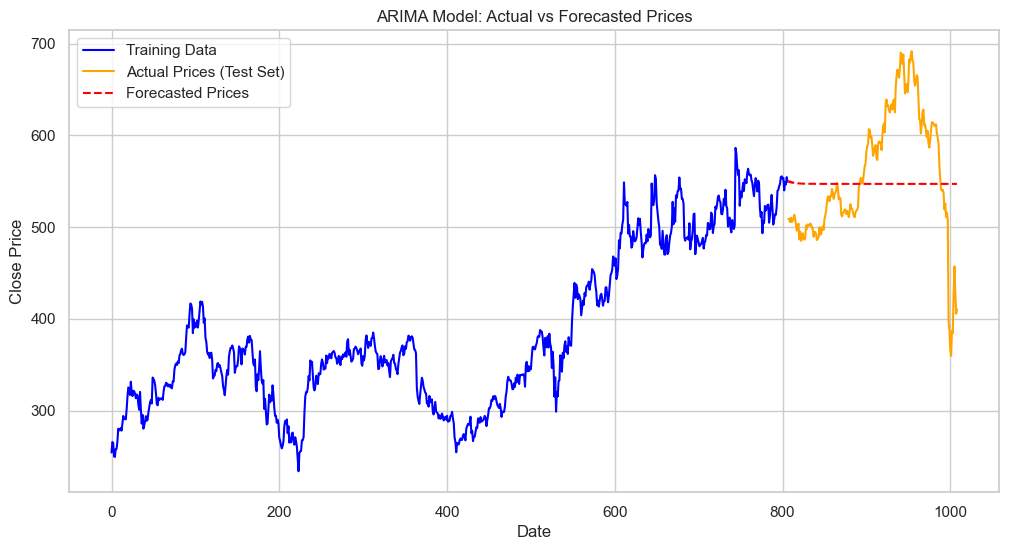

In [141]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA for netflix_stock_dataset
arima_model = ARIMA(train_stock, order=(2, 1, 2))  # Adjust ARIMA order based on ACF/PACF
arima_result = arima_model.fit()

# Print ARIMA Model Summary
print("\nARIMA Model Summary:")
print(arima_result.summary())

# Forecast on test set
forecast_stock = arima_result.forecast(steps=len(test_stock))

# Align the forecast index with the test set index
forecast_stock.index = test_stock.index

# Evaluate Forecast
stock_arima_result = evaluate_regression_model(
    test_stock, forecast_stock, "ARIMA (Stock)"
)

# Display Evaluation Results
print("\nARIMA Model Evaluation Metrics:")
for metric, value in stock_arima_result.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, float) else f"{metric}: {value}")

    
# Plot the actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_stock, label="Training Data", color="blue")
plt.plot(test_stock, label="Actual Prices (Test Set)", color="orange")
plt.plot(forecast_stock, label="Forecasted Prices", color="red", linestyle="--")
plt.title("ARIMA Model: Actual vs Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()


Regression Model Evaluation Results:
               Model       MAE        R²
0      Random Forest  0.257698  0.442964
1            XGBoost  0.276260  0.353214
2  Linear Regression  0.375388  0.273986


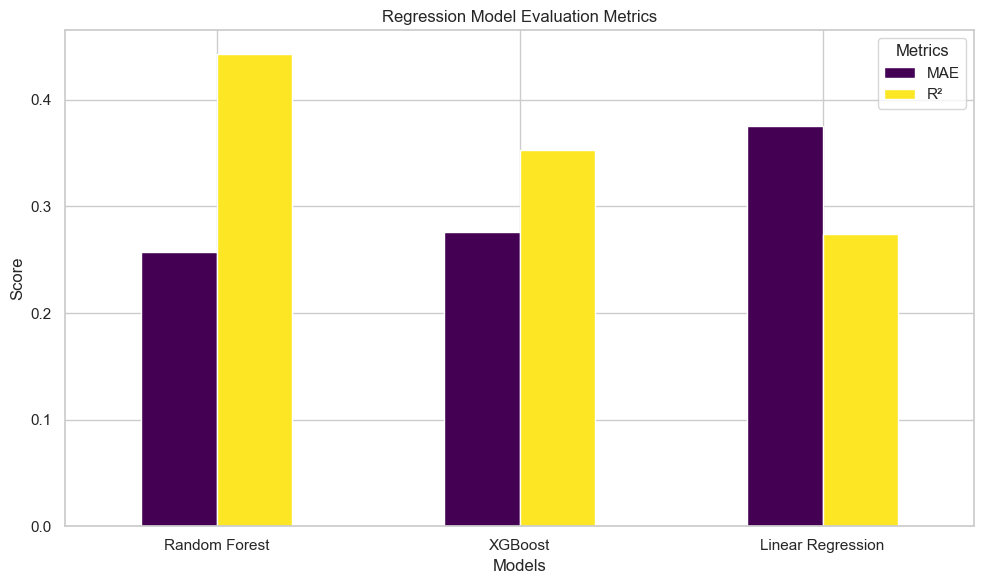

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Function to evaluate regression models
def evaluate_regression_model(y_true, y_pred, model_name):
    metrics = {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "R²": r2_score(y_true, y_pred),
    }
    return metrics

# Data Preparation
# Exclude target leakage by removing features derived from the target
features_to_exclude = ['success', 'imdb_score']  # Example: 'imdb_score' directly influences 'success'
X = merged_data_netflix.drop(columns=features_to_exclude).select_dtypes(include=[float, int])
y = merged_data_netflix['success']

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute missing values with column mean
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
random_forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
xgboost_model = XGBRegressor(random_state=42)
linear_model = LinearRegression()

# Train models
random_forest_model.fit(X_train, y_train)
xgboost_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_pred_xgb = xgboost_model.predict(X_test)
y_pred_lr = linear_model.predict(X_test)

# Evaluate models
rf_metrics = evaluate_regression_model(y_test, y_pred_rf, "Random Forest")
xgb_metrics = evaluate_regression_model(y_test, y_pred_xgb, "XGBoost")
lr_metrics = evaluate_regression_model(y_test, y_pred_lr, "Linear Regression")

# Combine results
results_df = pd.DataFrame([rf_metrics, xgb_metrics, lr_metrics])

# Display results
print("Regression Model Evaluation Results:")
print(results_df)

# Optional: Plot results
import matplotlib.pyplot as plt

results_df.set_index("Model").plot(kind="bar", figsize=(10, 6), rot=0, colormap="viridis")
plt.title("Regression Model Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()
